# Linear Models


***Materia: Ciencia y Analítica de Datos***


***Profesor: María de la Paz Rico Fernández***


***A01793499 Diego Fernando Guerra Burgos***

- In supervised learning, the training data fed to the algorithm includes the desired solutions, called labels. 
- In **regression**, the labels are continuous quantities.
- Linear models predict by computing a weighted sum of input features plus a bias term.

In [189]:
import numpy as np
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# to make this notebook's output stable across runs
np.random.seed(42)

In [2]:
5-2

3

## Simple Linear Regression

Simple linear regression equation:

$y = ax + b$
<br>
$a$: slope
<br>
$b$: intercept

Generate linear-looking data with the equation:

$y = 3X + 4 + noise$

In [11]:
np.random.rand(100, 1)

array([[0.44431127],
       [0.10590634],
       [0.61916002],
       [0.6195871 ],
       [0.03775914],
       [0.29066626],
       [0.41368626],
       [0.5502641 ],
       [0.29606343],
       [0.28774651],
       [0.98301516],
       [0.0418628 ],
       [0.98904541],
       [0.04775194],
       [0.28834143],
       [0.49369085],
       [0.14329834],
       [0.13484636],
       [0.25631271],
       [0.97350718],
       [0.38011686],
       [0.56599484],
       [0.7042914 ],
       [0.74222184],
       [0.68804097],
       [0.33692819],
       [0.11172783],
       [0.28171648],
       [0.21029523],
       [0.1362773 ],
       [0.02449673],
       [0.93572585],
       [0.92103439],
       [0.05041701],
       [0.17308457],
       [0.13950047],
       [0.28122293],
       [0.20406887],
       [0.94585354],
       [0.08417044],
       [0.21167083],
       [0.0807233 ],
       [0.98038535],
       [0.91841351],
       [0.71663159],
       [0.42597303],
       [0.19017814],
       [0.221

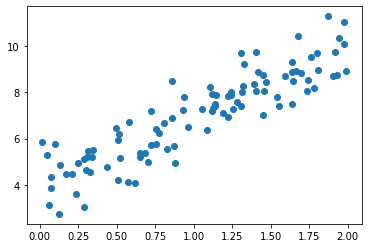

In [12]:
X = 2*np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
plt.scatter(X, y);

In [13]:
import pandas as pd
pd.DataFrame(y)

,0
0,8.915112
1,7.869443
2,4.341111
3,8.873350
4,4.473809
...,...
95,2.755608
96,8.031553
97,7.224392
98,7.810733


In [14]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X, y)

LinearRegression()

Plot the model's predictions:

In [15]:
#X_fit[]

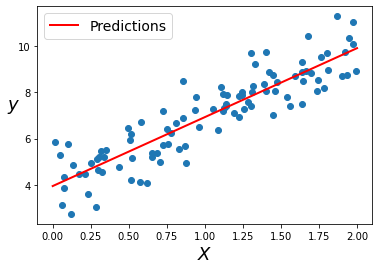

In [16]:
# construct best fit line
X_fit = np.linspace(0, 2, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X, y)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

Predictions are a good fit.

Generate new data to make predictions with the model:

In [17]:
X_new = np.array([[0], [2]])
X_new

array([[0],
       [2]])

In [18]:
X_new.shape

(2, 1)

In [19]:
y_new = linear_reg.predict(X_new)
y_new

array([[3.95603613],
       [9.9000948 ]])

In [20]:
 linear_reg.coef_, linear_reg.intercept_

(array([[2.97202934]]), array([3.95603613]))

The model estimates:

$\hat{y} = 3.36X + 3.74$

In [21]:
#|VENTAS|GANANCIAS|
#COEF*VENTAS+B
#|VENTAS|COMPRAS|GANANCIAS|
#COEF1*X1+COEF2*X2+B=Y

## Polynomial Regression

If data is more complex than a straight line, you can use a linear model ti fit non-linear data adding powers of each feature as new features and then train a linear model on the extended set of features. 

$$y = a_0 + a_1x_1 + a_2x_2 + a_3x_3 + ...$$ to $$y = a_0 + a_1x + a_2x^2 + a_3x^3+ ...$$ 

This is still a linear model, the linearity refers to the fact that the coefficients never multiply or divide each other.

To generate polynomial data we use the function:

$y = 0.50X^2 + X + 2 + noise$

In [22]:
# generate non-linear data e.g. quadratic equation
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

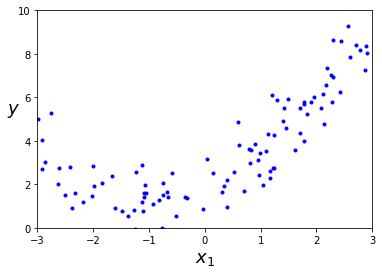

In [23]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10]);

In [24]:
import pandas as pd
pd.DataFrame(y)

,0
0,-0.072111
1,2.831513
2,4.278667
3,3.584967
4,5.779765
...,...
95,3.042815
96,2.581815
97,1.901315
98,9.295737


Now we can use `PolynomialFeatues` to transform training data adding the square of each feature as new features.

In [25]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [26]:
X_poly

array([[-1.25126237e+00,  1.56565752e+00],
       [-2.01136319e+00,  4.04558188e+00],
       [ 1.23773288e+00,  1.53198269e+00],
       [ 8.33733981e-01,  6.95112351e-01],
       [ 2.27369342e+00,  5.16968175e+00],
       [ 2.77154855e+00,  7.68148135e+00],
       [ 2.14318552e+00,  4.59324419e+00],
       [-2.63986921e+00,  6.96890947e+00],
       [ 9.87080598e-01,  9.74328107e-01],
       [ 1.70839448e+00,  2.91861169e+00],
       [ 2.89157235e+00,  8.36119063e+00],
       [-7.52032203e-01,  5.65552434e-01],
       [-1.98071048e+00,  3.92321399e+00],
       [ 2.11759837e+00,  4.48422286e+00],
       [-1.09519954e+00,  1.19946203e+00],
       [ 5.89211375e-01,  3.47170044e-01],
       [-6.60631415e-01,  4.36433866e-01],
       [-5.86042459e-01,  3.43445764e-01],
       [ 1.39478688e+00,  1.94543043e+00],
       [-8.31149248e-01,  6.90809072e-01],
       [ 1.15845068e+00,  1.34200797e+00],
       [-2.91402927e+00,  8.49156657e+00],
       [-1.05211566e+00,  1.10694736e+00],
       [-1.

`X_poly` now contains the original feature of X plus the square of the feature:

In [27]:
print(X[0])
print(X[0]*X[0])


[-1.25126237]
[1.56565752]


In [28]:
X_poly[0]

array([-1.25126237,  1.56565752])

Fit the model to this extended training data:

In [29]:
lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y)
lin_reg.coef_, lin_reg.intercept_

(array([[0.99108044, 0.5025979 ]]), array([1.87390091]))

The model estimates:

$\hat{y} =  0.89X +0.48X^2 + 2.09$

Plot the data and the predictions:

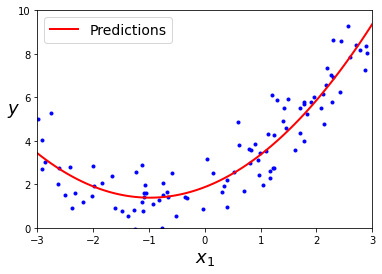

In [30]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10]);

## R square

R² es una medida estadística de qué tan cerca están los datos de la línea de regresión ajustada. También se conoce como el coeficiente de determinación o el coeficiente de determinación múltiple para la regresión múltiple. Para decirlo en un lenguaje más simple, R² es una medida de ajuste para los modelos de regresión lineal.



R² no indica si un modelo de regresión se ajusta adecuadamente a sus datos. Un buen modelo puede tener un valor R² bajo. Por otro lado, un modelo sesgado puede tener un valor alto de R².

 SSres + SSreg = SStot, R² = Explained variation / Total Variation
 
 ![image.png](https://i.stack.imgur.com/xb1VY.png)
 
![image.png](https://3.bp.blogspot.com/-MFqQLwbGwd4/WMO7tz39beI/AAAAAAAAF9I/Bjpfohgv_5E4lu7HzHJBQtXsBM--byqPwCLcB/s1600/rsquared.png)


# Ejercicio 1

Utiliza la base de datos de 
https://www.kaggle.com/vinicius150987/manufacturing-cost

Suponga que trabaja como consultor de una empresa de nueva creación que busca desarrollar un modelo para estimar el costo de los bienes vendidos a medida que varían el volumen de producción (número de unidades producidas). La startup recopiló datos y le pidió que desarrollara un modelo para predecir su costo frente a la cantidad de unidades vendidas.

In [190]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.sample(10)

,Number of Units,Manufacturing Cost
521,4.518689,38.634483
737,5.284690,33.233497
740,5.292696,34.550609
660,5.030596,34.982985
411,4.182289,43.090662
678,5.077623,29.087582
626,4.925292,39.152161
513,4.483809,41.780157
859,5.853092,36.344797
136,3.049856,54.462176


In [191]:
X = df[['Number of Units']]
y = df['Manufacturing Cost']

In [192]:
len(X)

1000

In [193]:
y.describe

<bound method NDFrame.describe of 0      95.066056
1      96.531750
2      73.661311
3      95.566843
4      98.777013
         ...    
995    23.855067
996    27.536542
997    25.973787
998    25.138311
999    21.547777
Name: Manufacturing Cost, Length: 1000, dtype: float64>

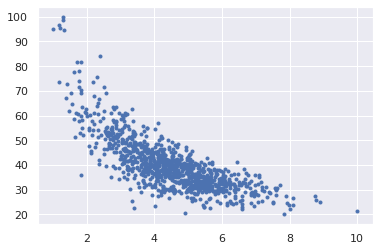

In [194]:
plt.plot(X,y,'b.')

In [195]:
#lineal

#Primero vamos a separar los datos en una base de datos de entrenamiento y de prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
#En este caso vamos a seleccionar un tamaño de prueba de 20% y entrenamiento de 80%


In [196]:
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)

print('Ecuación de regresión lineal sobre base de datos de entrenamiento: ', 'Y = ', linear_reg.intercept_, linear_reg.coef_[0], '*X')


Ecuación de regresión lineal sobre base de datos de entrenamiento:  Y =  66.79997932683362 -5.979127716940668 *X


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


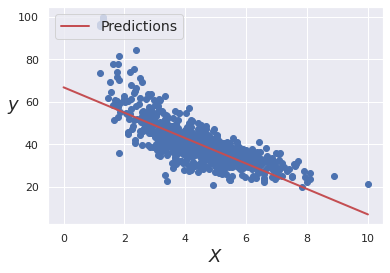

In [197]:
X_fit = np.linspace(0, 10, 100)
y_fit = linear_reg.predict(X_fit[:, np.newaxis])

plt.scatter(X_train, y_train)
plt.plot(X_fit, y_fit, "r-", linewidth=2, label="Predictions")
plt.xlabel("$X$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14);

In [198]:
#erorres 
#R2 

from sklearn import metrics
from sklearn.metrics import r2_score
mae_list = [] #Para graficar los mae de cada modelo vamos a crear una lista para guardar todos los MAE que calculemos
r2_list = []

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, linear_reg.predict(X_train)))
mae_list.append(metrics.mean_absolute_error(y_train, linear_reg.predict(X_train)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, linear_reg.predict(X_train))))
print('r2_score',r2_score(y_train, linear_reg.predict(X_train)))
r2_list.append(r2_score(y_train, linear_reg.predict(X_train)))

Error medio Absoluto (MAE): 4.885796539672615
Root Mean Squared Error: 6.8220153911183425
r2_score 0.5741612020971557


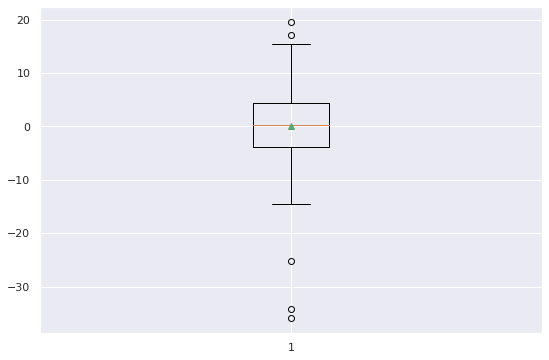

In [199]:
y_lineal = linear_reg.predict(X_test)
linear_reg_error = y_lineal -y_test

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(linear_reg_error, showmeans=True)
plt.show()

In [203]:
#polinomial
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=5, include_bias=False)
X_poly = poly_features.fit_transform(X_train)

lin_reg = LinearRegression(fit_intercept=True)
lin_reg.fit(X_poly, y_train)

print('Ecuación de regresión polinommial sobre base de datos de entrenamiento: ', 'Y = ', lin_reg.intercept_, '+', lin_reg.coef_[0], '*X', '+',  lin_reg.coef_)

Ecuación de regresión polinommial sobre base de datos de entrenamiento:  Y =  156.8176710580701 + -88.43298440950508 *X + [-8.84329844e+01  2.87963813e+01 -4.95228777e+00  4.23305809e-01
 -1.41308643e-02]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


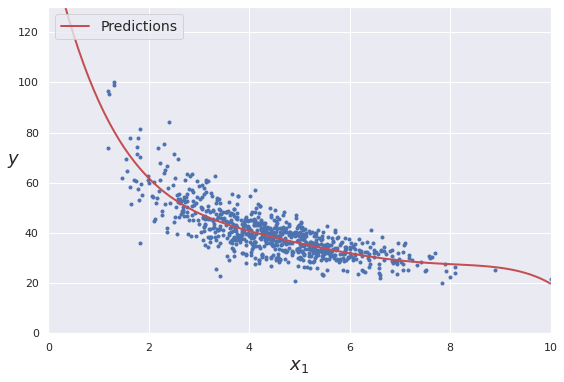

In [204]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 130]);

In [205]:
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, lin_reg.predict(X_poly)))
mae_list.append(metrics.mean_absolute_error(y_train, lin_reg.predict(X_poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lin_reg.predict(X_poly))))
print('r2_score',r2_score(y_train, lin_reg.predict(X_poly)))
r2_list.append(r2_score(y_train, lin_reg.predict(X_poly)))

Error medio Absoluto (MAE): 4.445317842045028
Root Mean Squared Error: 5.923606400651761
r2_score 0.6789355469744379


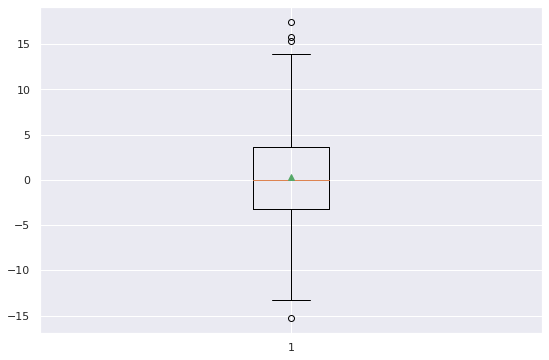

In [206]:

X_poly_test = poly_features.fit_transform(X_test)
y_polinomial = lin_reg.predict(X_poly_test)
poly_reg_error = y_polinomial -y_test

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(poly_reg_error, showmeans=True)
plt.show()

In [207]:
#Regresión Lasso
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X_poly, y_train)
print('Ecuación de regresión polinommial sobre base de datos de entrenamiento: ', 'Y = ', lasso_reg.intercept_, '+', lasso_reg.coef_[0], '*X', '+',  lasso_reg.coef_[1], '*X2')


Ecuación de regresión polinommial sobre base de datos de entrenamiento:  Y =  87.45330195542044 + -14.047500951675902 *X + -0.060161081318424056 *X2


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.125e+04, tolerance: 8.743e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


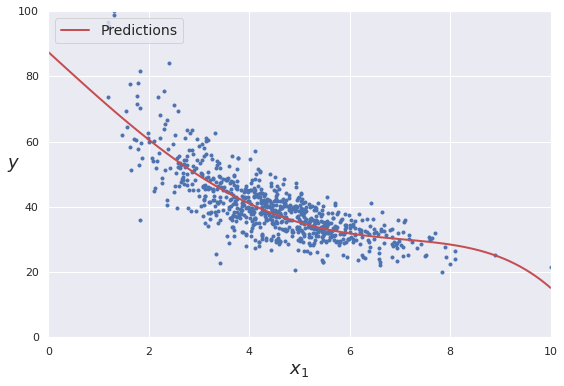

In [208]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lasso_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [209]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, lasso_reg.predict(X_poly)))
mae_list.append(metrics.mean_absolute_error(y_train, lasso_reg.predict(X_poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, lasso_reg.predict(X_poly))))
print('r2_score',r2_score(y_train, lasso_reg.predict(X_poly)))
r2_list.append(r2_score(y_train, lasso_reg.predict(X_poly)))

Error medio Absoluto (MAE): 4.507105463895747
Root Mean Squared Error: 6.106565269867385
r2_score 0.6587962118091302


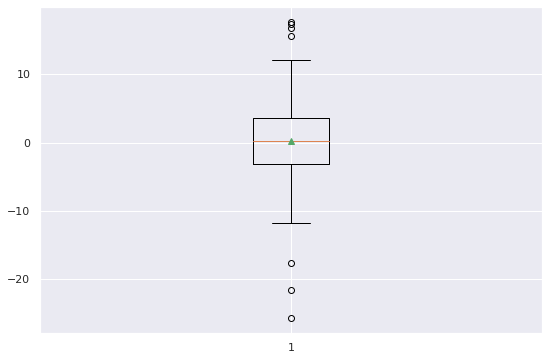

In [211]:

X_poly_test = poly_features.fit_transform(X_test)
y_polinomial = lasso_reg.predict(X_poly_test)
lasso_reg_error = y_polinomial -y_test

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(lasso_reg_error, showmeans=True)
plt.show()

In [212]:
#Regresion Ridge 
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.1)
ridge_reg.fit(X_poly, y_train)
print('Ecuación de regresión polinommial sobre base de datos de entrenamiento: ', 'Y = ', ridge_reg.intercept_, '+', ridge_reg.coef_[0], '*X', '+',  ridge_reg.coef_[1], '*X2')
print('Ecuación de regresión polinommial sobre base de datos de entrenamiento: ', 'Y = ', ridge_reg.intercept_, '+', ridge_reg.coef_[0], '*X', '+',  ridge_reg.coef_)

Ecuación de regresión polinommial sobre base de datos de entrenamiento:  Y =  124.8452190345542 + -48.12083654070998 *X + 10.429129082622147 *X2
Ecuación de regresión polinommial sobre base de datos de entrenamiento:  Y =  124.8452190345542 + -48.12083654070998 *X + [-4.81208365e+01  1.04291291e+01 -1.10530473e+00  4.86807536e-02
 -4.54172699e-04]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  "X does not have valid feature names, but"


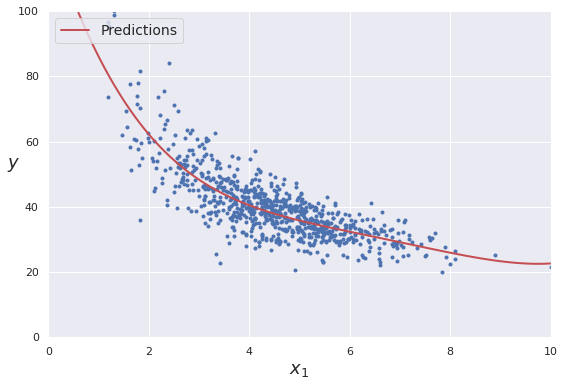

In [215]:
X_new=np.linspace(-0, 10, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = ridge_reg.predict(X_new_poly)
plt.plot(X_train, y_train, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 10, 0, 100]);

In [213]:
print('Error medio Absoluto (MAE):', metrics.mean_absolute_error(y_train, ridge_reg.predict(X_poly)))
mae_list.append(metrics.mean_absolute_error(y_train, ridge_reg.predict(X_poly)))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_train, ridge_reg.predict(X_poly))))
print('r2_score',r2_score(y_train, ridge_reg.predict(X_poly)))
r2_list.append(r2_score(y_train, ridge_reg.predict(X_poly)))

Error medio Absoluto (MAE): 4.461294409680987
Root Mean Squared Error: 5.946097263891023
r2_score 0.6764928711237723


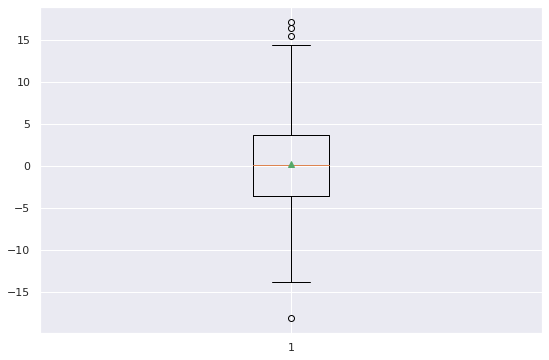

In [214]:
X_poly_test = poly_features.fit_transform(X_test)
y_polinomial = ridge_reg.predict(X_poly_test)
ridge_reg_error = y_polinomial -y_test

sns.set(rc={'figure.figsize':(9,6)})

plt.boxplot(ridge_reg_error, showmeans=True)
plt.show()

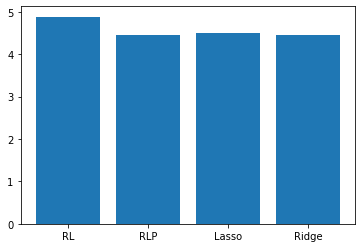

In [169]:
nombres=list()
nombres.append('RL')
nombres.append('RLP')
nombres.append('Lasso')
nombres.append('Ridge')

plt.bar(nombres, mae_list)
plt.show()

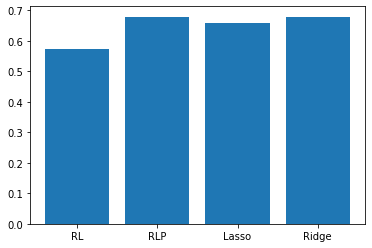

In [170]:
plt.bar(nombres, r2_list)
plt.show()

En general, el modelo polinomial es el que mejor se ajusta a los datos si tomamos en cuenta el MAE y el R cuadrado. En general, incluir un modelo polinomial agrega complejidad y el modelo puede acoplarse de mejor manera a los datos. En este caso no existe overfitting principalmente porque el R cuadrado no registra valores elevados. 

En cuanto a las regresiones Ridge y Lasso, su importancia radica en la definición del valor de Alpha. Para poder determinar su valor óptimo se requiere hacer Grid Search con Cross Validation. En general, estas regularizaciones ayudan mejorar el modelo tomando en cuenta el peso de cada variable y su importancia para la variable dependiente. 

#Ejercicio 2
Realiza la regresión polinomial de los siguientes datos:

In [216]:
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
9806,9407150310,20150128T000000,357000.0,4,2.50,1980,9757,2.0,0,0,...,7,1980,0,1995,0,98038,47.3675,-122.019,1610,6147
19855,254000241,20150324T000000,540000.0,3,2.50,2220,5279,2.0,0,0,...,8,2220,0,2006,0,98146,47.5132,-122.387,1610,5297
5870,3416601045,20140623T000000,345000.0,3,1.00,1140,4200,2.0,0,0,...,7,1140,0,1904,0,98144,47.6012,-122.296,1510,4000
3369,9407101380,20141230T000000,189000.0,3,2.00,1460,11481,1.0,0,0,...,7,1170,290,1995,0,98045,47.4493,-121.777,1540,9680
13685,3123059107,20140520T000000,555000.0,3,2.50,3050,158558,1.0,0,0,...,9,3050,0,1987,0,98055,47.4326,-122.208,2960,31050
11551,1938000140,20150428T000000,810000.0,4,2.00,2920,10424,1.0,0,0,...,8,1520,1400,1964,0,98005,47.5876,-122.172,2360,10696
283,7202360350,20140630T000000,780000.0,4,2.50,3500,7048,2.0,0,0,...,9,3500,0,2005,0,98053,47.6811,-122.025,3920,7864
3894,2085200261,20150218T000000,422500.0,3,2.00,1960,6450,1.0,0,0,...,7,1000,960,1977,0,98038,47.3972,-122.029,1660,20720
3931,3592500985,20150504T000000,880000.0,4,2.50,2350,4675,2.0,0,0,...,9,2150,200,1923,0,98112,47.6344,-122.305,2240,3848
19722,9161100075,20150318T000000,673000.0,4,2.25,2580,2875,2.0,0,0,...,9,2580,0,2015,0,98116,47.5674,-122.392,1290,5750


In [217]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [218]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [219]:
df.drop('id', axis = 1, inplace = True)
df.drop('date', axis = 1, inplace = True)
df.drop('zipcode', axis = 1, inplace = True)
df.drop('lat', axis = 1, inplace = True)
df.drop('long', axis = 1, inplace = True)


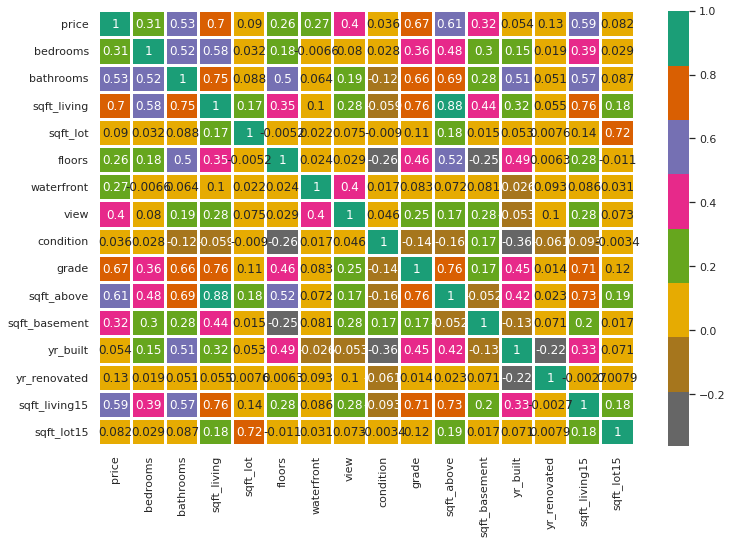

In [220]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

In [221]:
columns = df.columns.drop('price')

features = columns
label = ['price']

X = df[features]
y = df[label]

In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 101)

print(f'Numero total de registros en la bdd: {len(X)}')
print("*****"*10)
print(f'Numero total de registros en el training set: {len(X_train)}')
print(f'Tamaño de X_train: {X_train.shape}')
print("*****"*10)
print(f'Mumero total de registros en el test dataset: {len(X_test)}')
print(f'Tamaño del X_test: {X_test.shape}')

Numero total de registros en la bdd: 21613
**************************************************
Numero total de registros en el training set: 19451
Tamaño de X_train: (19451, 15)
**************************************************
Mumero total de registros en el test dataset: 2162
Tamaño del X_test: (2162, 15)


In [223]:
#Regresión lineal múltiple 
linear_reg = LinearRegression(fit_intercept=True)
linear_reg.fit(X_train, y_train)
print('Ecuación de regresión lineal sobre base de datos de entrenamiento: ', 'Y = ', linear_reg.intercept_, '+', linear_reg.coef_)

Ecuación de regresión lineal sobre base de datos de entrenamiento:  Y =  [6151359.2627409] + [[-3.82008048e+04  4.14661380e+04  1.07992584e+02  1.71356997e-02
   3.16916913e+04  5.52691023e+05  4.12493228e+04  2.12221443e+04
   1.19493216e+05  4.77750271e+01  6.02175565e+01 -3.55090216e+03
   1.32602215e+01  2.90059284e+01 -5.48132603e-01]]


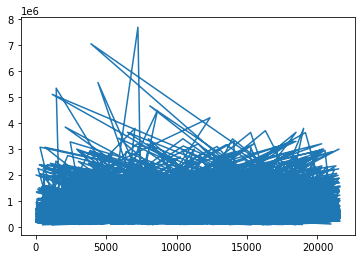